In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tweets.csv')

print(df.head())

sentiment_counts = df['Sentiment'].value_counts()

print(sentiment_counts)

   Sentiment                                              Tweet
0          1  The RG Kar incident was absolutely horrific an...
1          2  The horrific crime at RG Kar has shocked us to...
2          1  This is how safe women are in West Bengal, und...
3          2  The most desired last photographs of the murde...
4          1  That's not the murderer .. that's the scapegoa...
1    307
2    198
3    160
Name: Sentiment, dtype: int64


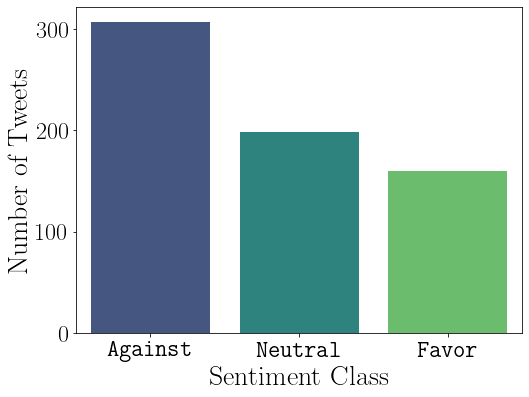

1    307
2    198
3    160
Name: Sentiment, dtype: int64


In [26]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 24,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
# plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Class', fontsize=28)
plt.ylabel('Number of Tweets', fontsize=28)
plt.xticks(ticks=[0, 1, 2], labels=[r'\texttt{Against}', r'\texttt{Neutral}', r'\texttt{Favor}'])
plt.show()
print(sentiment_counts)

## ML Models

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=100)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6842105263157895
Precision: 0.7574895092136472
Recall: 0.622236537087918
F1 : 0.6462500926924152

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.92      0.74        61
           2       0.79      0.53      0.64        43
           3       0.86      0.41      0.56        29

    accuracy                           0.68       133
   macro avg       0.76      0.62      0.65       133
weighted avg       0.73      0.68      0.67       133



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5864661654135338
Precision: 0.7952380952380952
Recall: 0.47114605106901375
F1 : 0.433330274948772

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.98      0.69        61
           2       0.85      0.40      0.54        43
           3       1.00      0.03      0.07        29

    accuracy                           0.59       133
   macro avg       0.80      0.47      0.43       133
weighted avg       0.74      0.59      0.51       133



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = SVC(kernel='linear', C=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.706766917293233
Precision: 0.718551367331855
Recall: 0.6802161252579962
F1 : 0.6938083121289228

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.80      0.75        61
           2       0.68      0.65      0.67        43
           3       0.77      0.59      0.67        29

    accuracy                           0.71       133
   macro avg       0.72      0.68      0.69       133
weighted avg       0.71      0.71      0.70       133



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6466165413533834
Precision: 0.6785714285714285
Recall: 0.5874295029381992
F1 : 0.6031967319858258

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.84      0.70        61
           2       0.71      0.58      0.64        43
           3       0.71      0.34      0.47        29

    accuracy                           0.65       133
   macro avg       0.68      0.59      0.60       133
weighted avg       0.67      0.65      0.63       133



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']


y = y - 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = XGBClassifier()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6766917293233082
Precision: 0.6619183285849952
Recall: 0.6614782582021989
F1 : 0.6585158548545277

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        61
           1       0.62      0.74      0.67        43
           2       0.59      0.55      0.57        29

    accuracy                           0.68       133
   macro avg       0.66      0.66      0.66       133
weighted avg       0.68      0.68      0.68       133



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
Precision: 0.5521922583012292
Recall: 0.5011809764199106
F1 : 0.48860497736902236

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.74      0.64        61
           2       0.59      0.63      0.61        43
           3       0.50      0.14      0.22        29

    accuracy                           0.57       133
   macro avg       0.55      0.50      0.49       133
weighted avg       0.56      0.57      0.54       133



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.706766917293233
Precision: 0.7060080442433384
Recall: 0.6877007550361304
F1 : 0.6949151182843752

Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.80      0.76        61
           2       0.67      0.60      0.63        43
           3       0.73      0.66      0.69        29

    accuracy                           0.71       133
   macro avg       0.71      0.69      0.69       133
weighted avg       0.71      0.71      0.70       133



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\Anurag Dutta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.5338345864661654
Precision: 0.5194649698960044
Recall: 0.523551605821184
F1 : 0.5206096585406931

Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.54      0.56        61
           2       0.52      0.58      0.55        43
           3       0.45      0.45      0.45        29

    accuracy                           0.53       133
   macro avg       0.52      0.52      0.52       133
weighted avg       0.54      0.53      0.53       133



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5639097744360902
Precision: 0.5438842203548085
Recall: 0.5506067019864068
F1 : 0.5459684438747251

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.62      0.64        61
           2       0.52      0.51      0.52        43
           3       0.44      0.52      0.48        29

    accuracy                           0.56       133
   macro avg       0.54      0.55      0.55       133
weighted avg       0.57      0.56      0.57       133



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6616541353383458
Precision: 0.717757215245649
Recall: 0.5862989206883406
F1 : 0.5976467976467976

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.90      0.73        61
           2       0.74      0.58      0.65        43
           3       0.80      0.28      0.41        29

    accuracy                           0.66       133
   macro avg       0.72      0.59      0.60       133
weighted avg       0.70      0.66      0.64       133



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is already defined
X = df['Tweet']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

base_model = LogisticRegression()
model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 :", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6541353383458647
Precision: 0.7504190081829835
Recall: 0.5791692411514411
F1 : 0.5977074007446764

Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.95      0.73        61
           2       0.83      0.44      0.58        43
           3       0.83      0.34      0.49        29

    accuracy                           0.65       133
   macro avg       0.75      0.58      0.60       133
weighted avg       0.72      0.65      0.63       133



## DL Models

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


X = df['Tweet']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
14/14 [==============================] - 7s 258ms/step - loss: 1.0843 - accuracy: 0.4541 - val_loss: 1.0450 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 3s 217ms/step - loss: 1.0425 - accuracy: 0.4612 - val_loss: 1.0363 - val_accuracy: 0.4673
Epoch 3/10
14/14 [==============================] - 3s 219ms/step - loss: 0.8613 - accuracy: 0.5553 - val_loss: 1.2132 - val_accuracy: 0.5607
Epoch 4/10
14/14 [==============================] - 2s 172ms/step - loss: 0.5109 - accuracy: 0.8447 - val_loss: 1.0880 - val_accuracy: 0.6075
Epoch 5/10
14/14 [==============================] - 2s 176ms/step - loss: 0.3133 - accuracy: 0.9153 - val_loss: 0.8758 - val_accuracy: 0.6168
Epoch 6/10
14/14 [==============================] - 3s 184ms/step - loss: 0.1062 - accuracy: 0.9741 - val_loss: 0.9428 - val_accuracy: 0.6262
Epoch 7/10
14/14 [==============================] - 2s 169ms/step - loss: 0.0558 - accuracy: 0.9835 - val_loss: 1.0189 - val_accuracy: 0.6636
Epoch 

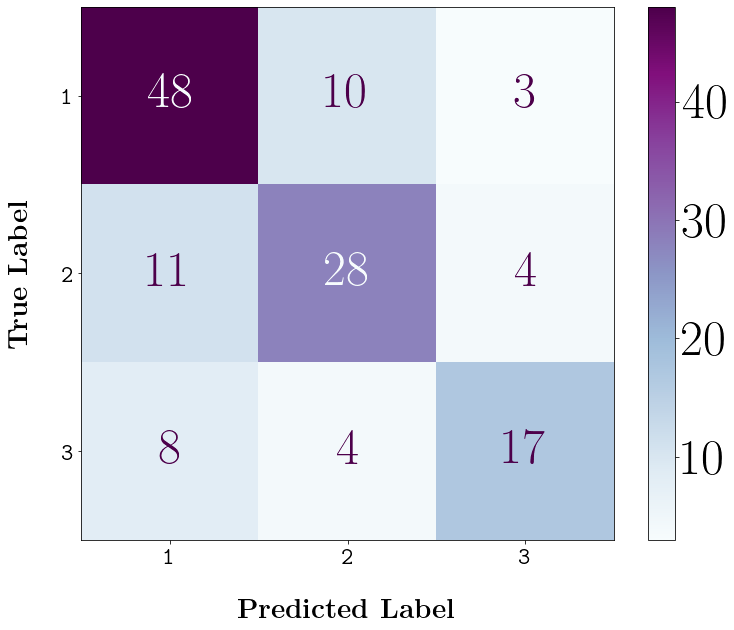

In [15]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
formatted_classes = [rf'\texttt{{{cls}}}' for cls in label_encoder.classes_]

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 50,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=formatted_classes)
disp.plot(cmap=plt.cm.BuPu, ax=ax)
# plt.title(r'\textbf{LSTM Sentiment Analysis}', fontsize=40, pad=20)
plt.xlabel(r'\textbf{Predicted Label}', fontsize=28, labelpad=30)
plt.ylabel(r'\textbf{True Label}', fontsize=28, labelpad=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.savefig('lstm_cm.pdf', format='pdf')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Data preparation
X = df['Tweet']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Model construction
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluation
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
14/14 [==============================] - 6s 203ms/step - loss: 1.0732 - accuracy: 0.4400 - val_loss: 1.0439 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 2s 148ms/step - loss: 1.0040 - accuracy: 0.4612 - val_loss: 0.9947 - val_accuracy: 0.4860
Epoch 3/10
14/14 [==============================] - 2s 156ms/step - loss: 0.6850 - accuracy: 0.6965 - val_loss: 0.9367 - val_accuracy: 0.5888
Epoch 4/10
14/14 [==============================] - 2s 157ms/step - loss: 0.2899 - accuracy: 0.9412 - val_loss: 1.0774 - val_accuracy: 0.6168
Epoch 5/10
14/14 [==============================] - 2s 148ms/step - loss: 0.0743 - accuracy: 0.9812 - val_loss: 1.5168 - val_accuracy: 0.5514
Epoch 6/10
14/14 [==============================] - 2s 159ms/step - loss: 0.0332 - accuracy: 0.9929 - val_loss: 1.4421 - val_accuracy: 0.6262
Epoch 7/10
14/14 [==============================] - 2s 165ms/step - loss: 0.0126 - accuracy: 0.9953 - val_loss: 1.6588 - val_accuracy: 0.5701
Epoch 

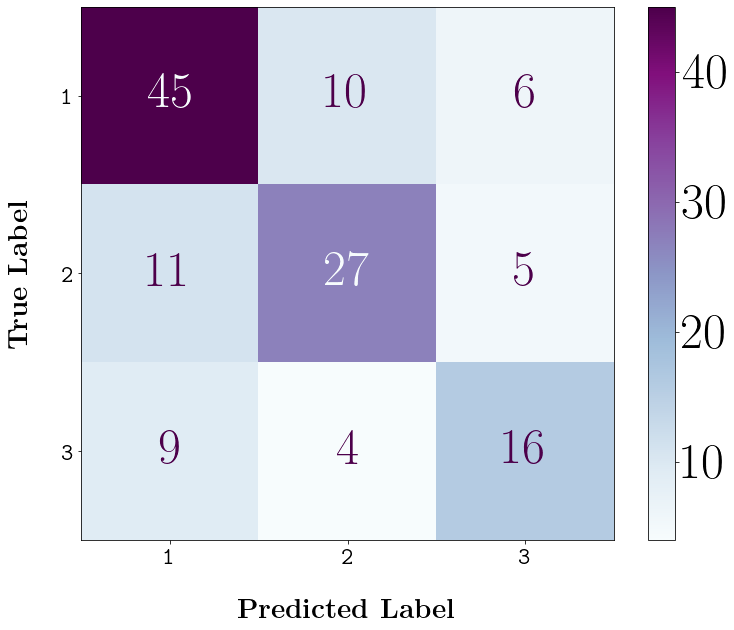

In [17]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
formatted_classes = [rf'\texttt{{{cls}}}' for cls in label_encoder.classes_]

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 50,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=formatted_classes)
disp.plot(cmap=plt.cm.BuPu, ax=ax)
# plt.title(r'\textbf{GRU Sentiment Analysis}', fontsize=40, pad=20)
plt.xlabel(r'\textbf{Predicted Label}', fontsize=28, labelpad=30)
plt.ylabel(r'\textbf{True Label}', fontsize=28, labelpad=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.savefig('gru_cm.pdf', format='pdf')
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Data preparation
X = df['Tweet']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Model construction
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluation
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
14/14 [==============================] - 1s 35ms/step - loss: 1.0711 - accuracy: 0.4541 - val_loss: 1.0500 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 0s 26ms/step - loss: 1.0244 - accuracy: 0.4824 - val_loss: 1.0403 - val_accuracy: 0.4766
Epoch 3/10
14/14 [==============================] - 0s 27ms/step - loss: 0.9442 - accuracy: 0.5059 - val_loss: 1.0283 - val_accuracy: 0.4673
Epoch 4/10
14/14 [==============================] - 0s 27ms/step - loss: 0.8097 - accuracy: 0.6282 - val_loss: 1.0125 - val_accuracy: 0.4766
Epoch 5/10
14/14 [==============================] - 0s 26ms/step - loss: 0.5936 - accuracy: 0.9012 - val_loss: 0.9889 - val_accuracy: 0.5047
Epoch 6/10
14/14 [==============================] - 0s 27ms/step - loss: 0.3227 - accuracy: 0.9647 - val_loss: 0.9666 - val_accuracy: 0.5327
Epoch 7/10
14/14 [==============================] - 0s 29ms/step - loss: 0.1468 - accuracy: 0.9906 - val_loss: 0.9087 - val_accuracy: 0.5794
Epoch 8/10
14

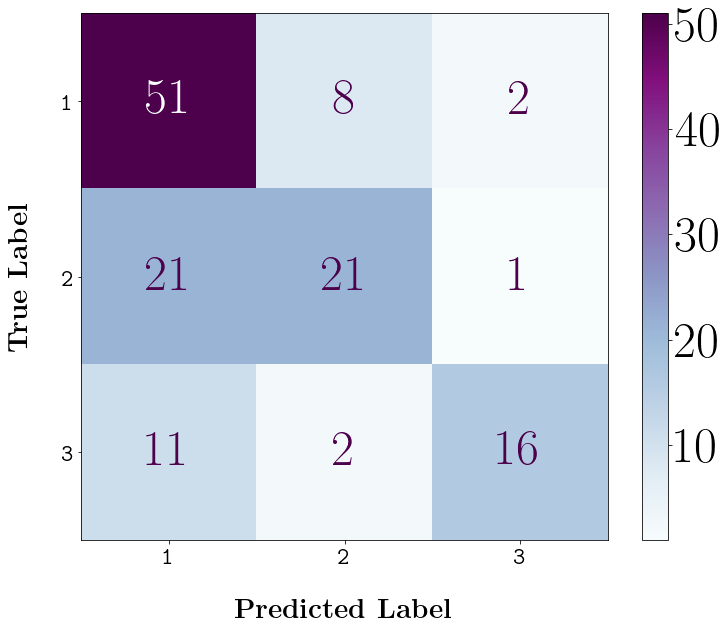

In [19]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
formatted_classes = [rf'\texttt{{{cls}}}' for cls in label_encoder.classes_]

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 50,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=formatted_classes)
disp.plot(cmap=plt.cm.BuPu, ax=ax)
# plt.title(r'\textbf{CNN Sentiment Analysis}', fontsize=40, pad=20)
plt.xlabel(r'\textbf{Predicted Label}', fontsize=28, labelpad=30)
plt.ylabel(r'\textbf{True Label}', fontsize=28, labelpad=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.savefig('cnn_cm.pdf', format='pdf')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Data preparation
X = df['Tweet']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Model construction
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluation
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Epoch 1/10
14/14 [==============================] - 13s 467ms/step - loss: 1.0741 - accuracy: 0.4447 - val_loss: 1.0541 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 5s 324ms/step - loss: 1.0380 - accuracy: 0.4659 - val_loss: 1.0073 - val_accuracy: 0.4673
Epoch 3/10
14/14 [==============================] - 5s 328ms/step - loss: 0.8000 - accuracy: 0.5788 - val_loss: 0.8770 - val_accuracy: 0.5607
Epoch 4/10
14/14 [==============================] - 5s 355ms/step - loss: 0.3862 - accuracy: 0.8847 - val_loss: 1.1377 - val_accuracy: 0.6262
Epoch 5/10
14/14 [==============================] - 5s 379ms/step - loss: 0.1347 - accuracy: 0.9671 - val_loss: 1.4727 - val_accuracy: 0.6449
Epoch 6/10
14/14 [==============================] - 5s 364ms/step - loss: 0.0815 - accuracy: 0.9788 - val_loss: 1.7418 - val_accuracy: 0.5794
Epoch 7/10
14/14 [==============================] - 5s 380ms/step - loss: 0.0588 - accuracy: 0.9882 - val_loss: 1.4349 - val_accuracy: 0.6262
Epoch

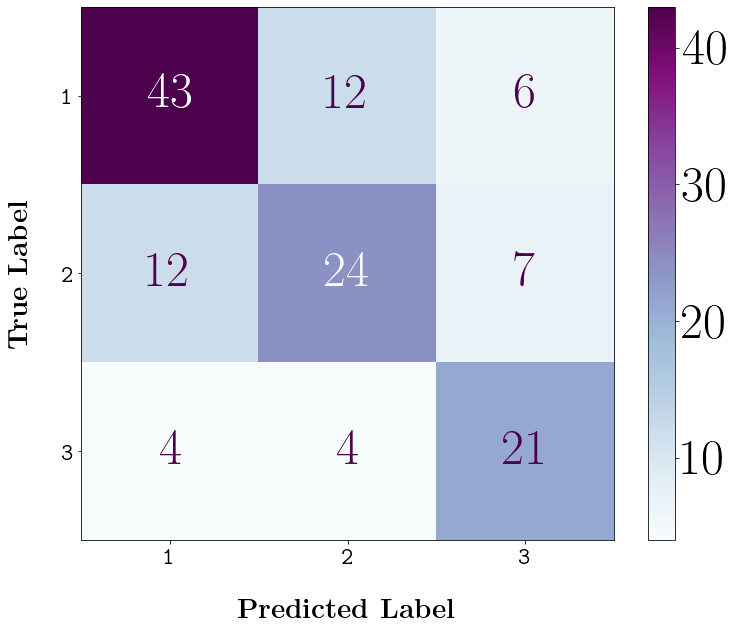

In [21]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
formatted_classes = [rf'\texttt{{{cls}}}' for cls in label_encoder.classes_]

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 50,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=formatted_classes)
disp.plot(cmap=plt.cm.BuPu, ax=ax)
# plt.title(r'\textbf{Bi-LSTM Sentiment Analysis}', fontsize=40, pad=20)
plt.xlabel(r'\textbf{Predicted Label}', fontsize=28, labelpad=30)
plt.ylabel(r'\textbf{True Label}', fontsize=28, labelpad=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.savefig('bi_lstm_cm.pdf', format='pdf')
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Data preparation
X = df['Tweet']
y = df['Sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Model construction
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluation
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
precision = precision_score(y_test_labels, y_pred, average='macro')
recall = recall_score(y_test_labels, y_pred, average='macro')
f1 = f1_score(y_test_labels, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
14/14 [==============================] - 1s 34ms/step - loss: 1.1020 - accuracy: 0.4353 - val_loss: 1.0400 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 0s 25ms/step - loss: 1.0468 - accuracy: 0.4659 - val_loss: 1.0448 - val_accuracy: 0.4673
Epoch 3/10
14/14 [==============================] - 0s 30ms/step - loss: 0.9779 - accuracy: 0.4941 - val_loss: 1.0399 - val_accuracy: 0.4766
Epoch 4/10
14/14 [==============================] - 0s 27ms/step - loss: 0.8570 - accuracy: 0.6424 - val_loss: 1.0106 - val_accuracy: 0.4766
Epoch 5/10
14/14 [==============================] - 0s 26ms/step - loss: 0.6706 - accuracy: 0.7106 - val_loss: 0.9729 - val_accuracy: 0.5701
Epoch 6/10
14/14 [==============================] - 0s 26ms/step - loss: 0.4216 - accuracy: 0.9082 - val_loss: 0.9737 - val_accuracy: 0.5047
Epoch 7/10
14/14 [==============================] - 0s 29ms/step - loss: 0.2357 - accuracy: 0.9435 - val_loss: 0.9757 - val_accuracy: 0.5140
Epoch 8/10
14

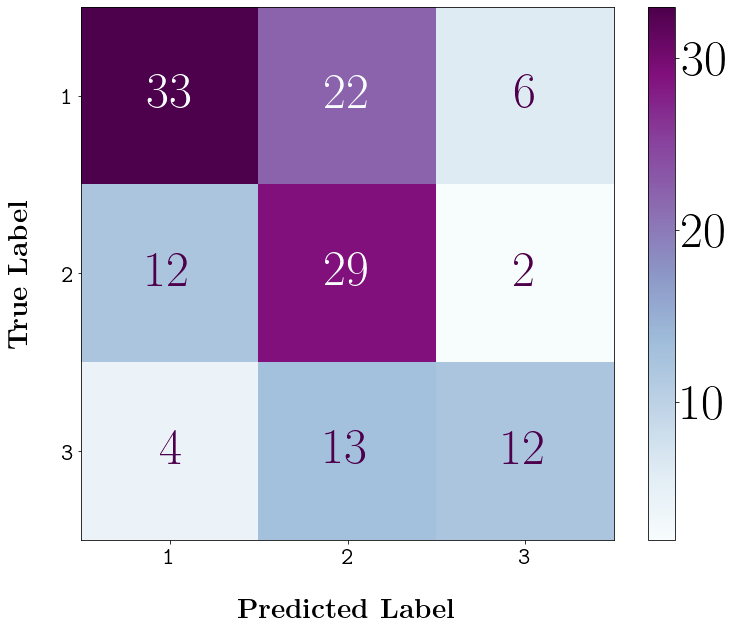

In [23]:
conf_matrix = confusion_matrix(y_test_labels, y_pred)
formatted_classes = [rf'\texttt{{{cls}}}' for cls in label_encoder.classes_]

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 50,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=formatted_classes)
disp.plot(cmap=plt.cm.BuPu, ax=ax)
# plt.title(r'\textbf{FFNN Sentiment Analysis}', fontsize=40, pad=20)
plt.xlabel(r'\textbf{Predicted Label}', fontsize=28, labelpad=30)
plt.ylabel(r'\textbf{True Label}', fontsize=28, labelpad=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
# plt.savefig('ffnn_cm.pdf', format='pdf')
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Anurag
[nltk_data]     Dutta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anurag
[nltk_data]     Dutta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Most common words for sentiment 1:
kar: 92
rg: 87
police: 69
mamata: 68
mamatamustresign: 62
bengal: 59
kolkata: 48
hospital: 48
banerjee: 44
case: 43


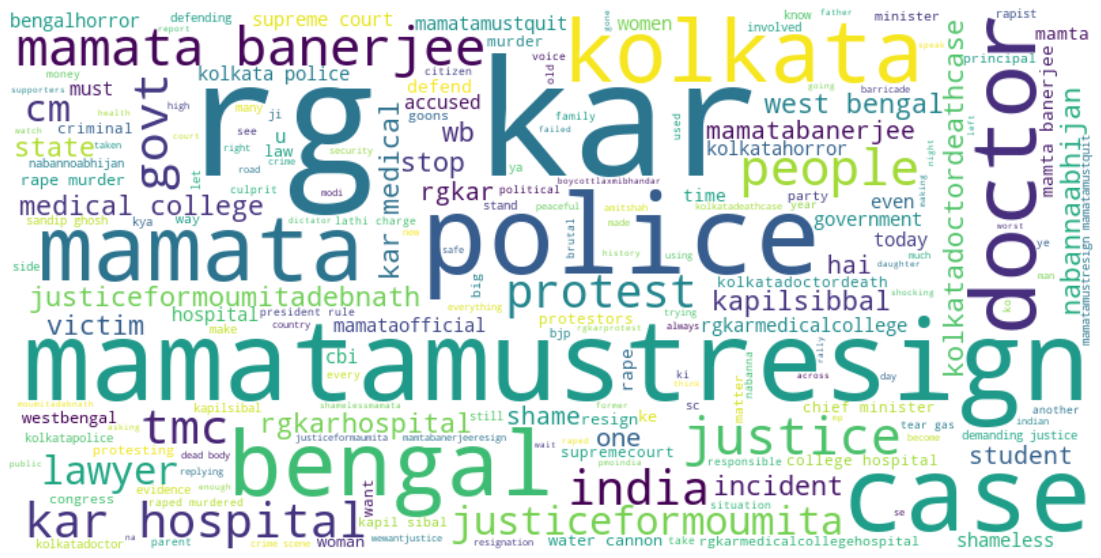


Most common words for sentiment 2:
kar: 83
rg: 80
hospital: 64
medical: 49
college: 47
kolkata: 47
doctor: 42
rape: 37
rgkarhospital: 36
justice: 33


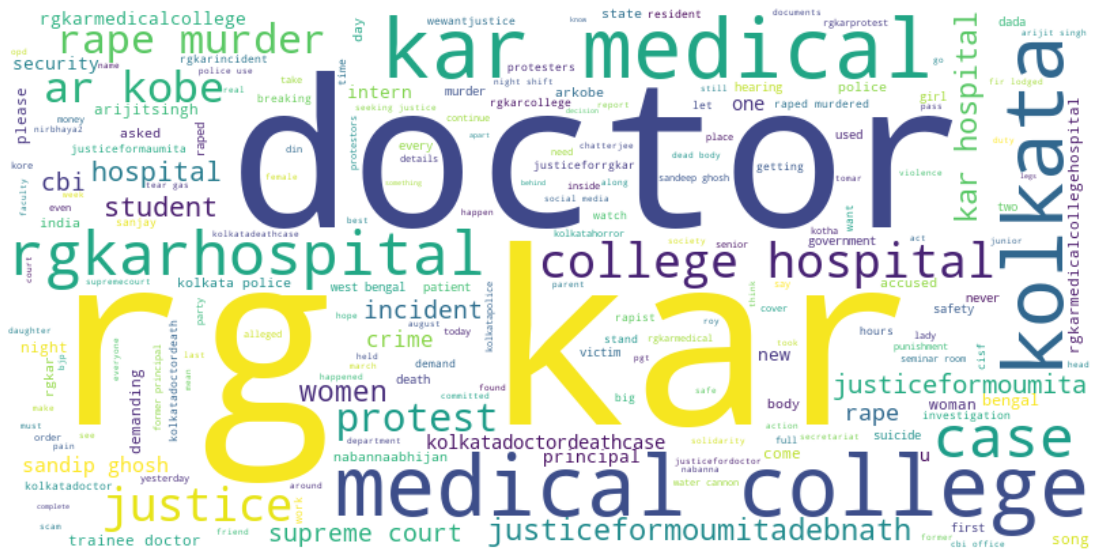


Most common words for sentiment 3:
bengal: 53
bjp: 38
justice: 34
kar: 29
rg: 28
police: 27
west: 23
media: 23
mamataofficial: 19
people: 18


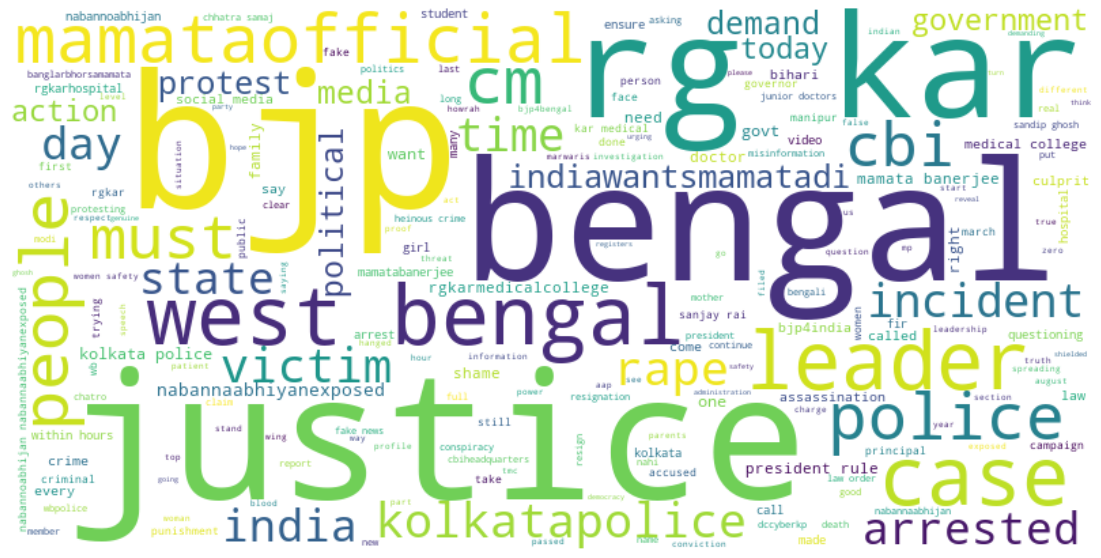

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('tweets.csv')


tweets = df['Tweet']
sentiments = df['Sentiment']

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Tokenize and remove stopwords."""
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

sentiment_labels = df['Sentiment'].unique()

for sentiment in sentiment_labels:
    sentiment_texts = df[df['Sentiment'] == sentiment]['Tweet']
    all_words = ' '.join(sentiment_texts)
    all_tokens = preprocess_text(all_words)

    fdist = FreqDist(all_tokens)
    
    print(f"\nMost common words for sentiment {sentiment}:")
    for word, freq in fdist.most_common(10):
        print(f"{word}: {freq}")
    
    plot_wordcloud(' '.join(all_tokens), f"")

In [25]:
import pandas as pd
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('tweets.csv')

tweets = df['Tweet']
sentiments = df['Sentiment']

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Tokenize and remove stopwords."""
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

def get_ngrams(texts, n):
    """Generate n-grams from a list of texts."""
    n_grams = []
    for text in texts:
        tokens = preprocess_text(text)
        n_grams.extend(ngrams(tokens, n))
    return n_grams

sentiment_labels = df['Sentiment'].unique()

for sentiment in sentiment_labels:
    sentiment_texts = df[df['Sentiment'] == sentiment]['Tweet']
    
    bigrams = get_ngrams(sentiment_texts, 2)
    trigrams = get_ngrams(sentiment_texts, 3)
    fourgrams = get_ngrams(sentiment_texts, 4)
    
    print(f"\nMost common bigrams for sentiment {sentiment}:")
    bigram_freq = FreqDist(bigrams)
    for bigram, freq in bigram_freq.most_common(10):
        print(f"{' '.join(bigram)}: {freq}")
    
    print(f"\nMost common trigrams for sentiment {sentiment}:")
    trigram_freq = FreqDist(trigrams)
    for trigram, freq in trigram_freq.most_common(10):
        print(f"{' '.join(trigram)}: {freq}")
    
    print(f"\nMost common 4-grams for sentiment {sentiment}:")
    fourgram_freq = FreqDist(fourgrams)
    for fourgram, freq in fourgram_freq.most_common(10):
        print(f"{' '.join(fourgram)}: {freq}")


[nltk_data] Downloading package stopwords to C:\Users\Anurag
[nltk_data]     Dutta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anurag
[nltk_data]     Dutta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Most common bigrams for sentiment 1:
rg kar: 85
mamata banerjee: 32
kar hospital: 26
west bengal: 24
kar medical: 23
medical college: 22
kolkata police: 16
supreme court: 14
mamta banerjee: 12
rape murder: 11

Most common trigrams for sentiment 1:
rg kar hospital: 25
kar medical college: 22
rg kar medical: 21
medical college hospital: 10
rg kar rape: 5
justice rg kar: 5
doctor rg kar: 4
wb mamata banerjee: 4
rg kar case: 4
rg kar incident: 3

Most common 4-grams for sentiment 1:
rg kar medical college: 20
kar medical college hospital: 10
doctor rg kar medical: 3
mohun bagan east bengal: 3
raped murdered rg kar: 3
medical college hospital kolkata: 3
accused kolkatadoctordeathcase supreme court: 3
rg kar rape murder: 2
kar medical college kolkata: 2
kolkata rg kar hospital: 2

Most common bigrams for sentiment 2:
rg kar: 80
medical college: 41
kar medical: 40
college hospital: 31
ar kobe: 26
rape murder: 22
kar hospital: 20
supreme court: 16
sandip ghosh: 13
trainee doctor: 9

Most comm